In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [69]:
# Load the dataset
X_train = pd.read_csv('../outputs/01/X_train.csv', index_col='Unnamed: 0')
pred_train = pd.read_csv('../outputs/01/pred_train.csv', index_col='Unnamed: 0')
print(X_train.shape)
X_train.head()

(46913, 11)


,person_age,person_income,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_own,home_mortgage
28905,22,53760,3.0,0.080694,4000,13.43,0.07,0,2,0,0
34862,22,26886,6.0,0.080694,7500,13.49,0.28,1,2,0,0
32740,26,57000,10.0,0.484107,3500,7.68,0.06,0,4,0,1
45780,23,48000,8.0,0.318378,5000,12.42,0.10,0,3,0,0
21826,34,62500,2.0,-0.266971,16000,10.99,0.26,0,7,0,1


In [70]:
# Apply scaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X_train)
scaled = pd.DataFrame(scaled, columns=X_train.columns)
scaled.head()

,person_age,person_income,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_own,home_mortgage
0,-0.919846,-0.270573,-0.435220,0.149462,-0.934677,0.905706,-0.972451,-0.415299,-0.944984,-0.238106,-0.857441
1,-0.919846,-0.981317,0.335309,0.149462,-0.306111,0.925476,1.318521,2.407904,-0.944984,-0.238106,-0.857441
2,-0.254758,-0.184884,1.362680,1.435084,-1.024472,-0.988873,-1.081545,-0.415299,-0.447994,-0.238106,1.166261
3,-0.753574,-0.422909,0.848994,0.906929,-0.755087,0.572919,-0.645170,-0.415299,-0.696489,-0.238106,-0.857441
4,1.075418,-0.039424,-0.692062,-0.958501,1.220406,0.101745,1.100333,-0.415299,0.297492,-0.238106,1.166261


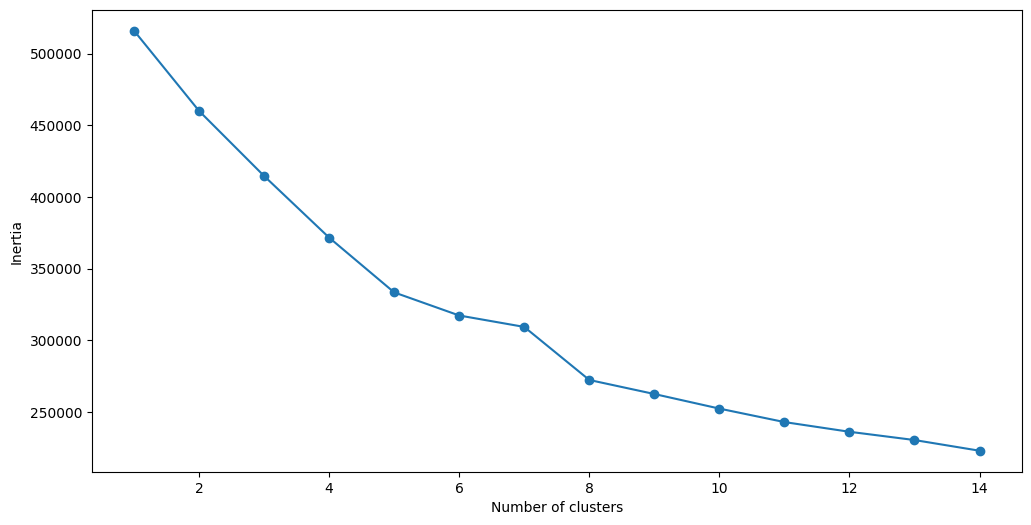

In [7]:
# Choosing number of clusters for test data
inertia = []
for cluster in range(1,15):
    kmeans = KMeans(n_clusters=cluster, random_state=123)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

# Plot cluster numbers and inertia
cluster_result = pd.DataFrame({'Cluster':range(1,15), 'inertia':inertia})
plt.figure(figsize=(12,6))
plt.plot(cluster_result['Cluster'], cluster_result['inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [72]:
# Create the kMeans
kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(scaled)
clusters = kmeans.predict(scaled)

data_cluster = pd.concat([X_train, pred_train], axis=1)
data_cluster['clusters'] = clusters
data_cluster['clusters'] = data_cluster['clusters'].map({0:0 , 1:3, 2:4, 3:2, 4:1})
data_cluster.head()

,person_age,person_income,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_own,home_mortgage,probability,true,prediction,clusters
28905,22,53760,3.0,0.080694,4000,13.43,0.07,0,2,0,0,0.039574,0,0,3
34862,22,26886,6.0,0.080694,7500,13.49,0.28,1,2,0,0,0.179108,0,0,1
32740,26,57000,10.0,0.484107,3500,7.68,0.06,0,4,0,1,0.005868,0,0,4
45780,23,48000,8.0,0.318378,5000,12.42,0.10,0,3,0,0,0.038395,0,0,3
21826,34,62500,2.0,-0.266971,16000,10.99,0.26,0,7,0,1,0.032011,0,0,0


In [73]:
# Save the clustering
data_cluster['clusters'].to_csv('../outputs/02/kmeans_clusters.csv')

In [5]:
# data_cluster = pd.read_csv('../outputs/02/kmeans_clusters.csv', index_col='Unnamed: 0')
# data_cluster = pd.concat([X_train, pred_train, data_cluster], axis=1)

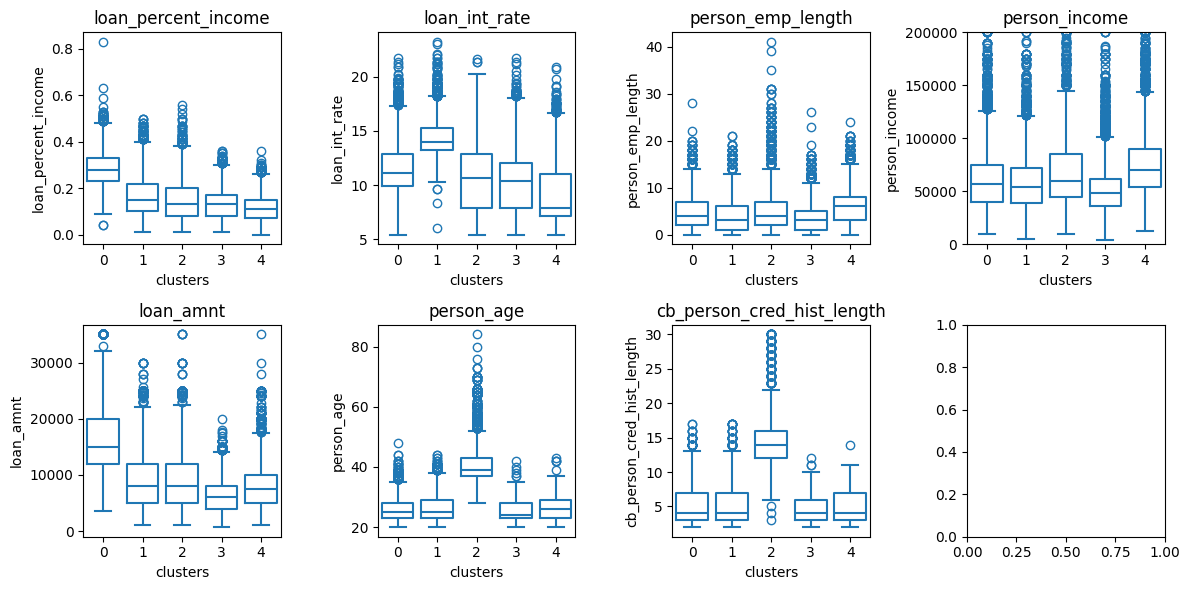

In [74]:
# Plot the count bars
fig, ax = plt.subplots(2, 4, figsize=(12,6))

row = 0
column = 0
for col in [
    'loan_percent_income', 'loan_int_rate', 'person_emp_length', 'person_income', 'loan_amnt',
    'person_age', 'cb_person_cred_hist_length'
]:
    sns.boxplot(data=data_cluster, y=col, x='clusters', ax=ax[row, column],  fill=False)
    ax[row, column].set_title(col)
    if col == 'person_income':
        ax[row, column].set_ylim(0, 2e5)
    
    column += 1
    if column == 4:
        column = 0
        row+= 1

plt.tight_layout()
plt.show()

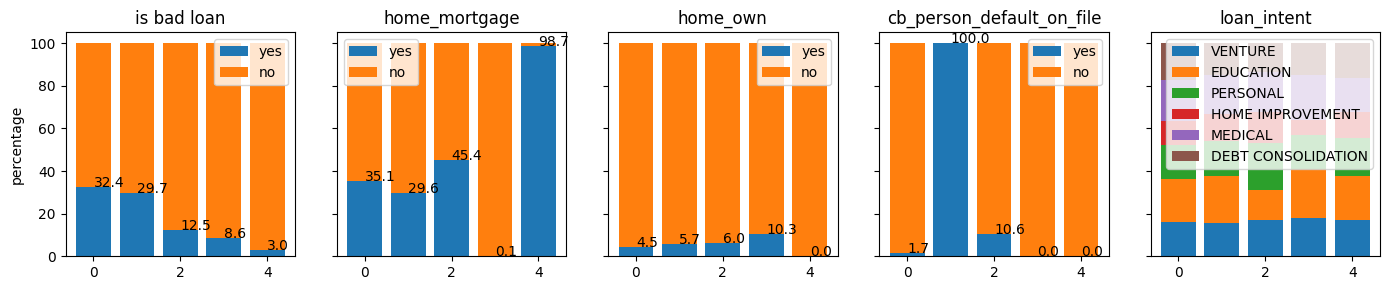

In [78]:
fig, ax = plt.subplots(1, 5, figsize=(14,3), sharey=True)

ax[0].set_ylabel('percentage')
column = 0
for col in ['true', 'home_mortgage', 'home_own', 'cb_person_default_on_file']:
    barplot = pd.DataFrame(data_cluster[[col, 'clusters']].value_counts()).reset_index()
    barplot.columns = [col, 'clusters', 'count']
    barplot = barplot.pivot(index='clusters', columns=col, values='count').reset_index()
    barplot.columns.name = None
    barplot = barplot.fillna(0)
    barplot['yes_percent'] = round(barplot[1] / (barplot[0] + barplot[1]) * 100, 1)
    barplot['no_percent'] = round(barplot[0] / (barplot[0] + barplot[1]) * 100, 1)
    
    ax[column].bar(barplot['clusters'], barplot['yes_percent'], label='yes')
    ax[column].bar(barplot['clusters'], barplot['no_percent'], bottom=barplot['yes_percent'], label='no')
    if col != 'true':
        ax[column].set_title(col)
    else:
        ax[column].set_title('is bad loan')
    ax[column].legend()
    for i in range(len(barplot)):
        percentage = barplot.loc[barplot.index==i, 'yes_percent'].values[0]
        ax[column].text(i, percentage, percentage)

    column += 1

# Plot the loan intent
col = 'loan_intent'
barplot = pd.DataFrame(data_cluster[[col, 'clusters']].value_counts()).reset_index()
barplot.columns = [col, 'clusters', 'count']
barplot[col] = round(barplot[col], 2)
intent_dict = {0.48: 'VENTURE', 0.32: 'EDUCATION', 0.08: 'PERSONAL', -0.24: 'HOME IMPROVEMENT', -0.27: 'MEDICAL', -0.34: 'DEBT CONSOLIDATION'}
barplot[col] = barplot[col].map(intent_dict)

barplot = barplot.pivot(index='clusters', columns=col, values='count').reset_index()
barplot.columns.name = None
barplot = barplot.fillna(0)
for intent in intent_dict.values():
    barplot[f'{intent}_percent'] = round(barplot[intent] / barplot[intent_dict.values()].sum(1) * 100, 1)

intent = 'VENTURE'
ax[column].bar(barplot['clusters'], barplot[f'{intent}_percent'], label=intent)
bottom = barplot['VENTURE_percent']
for intent in list(intent_dict.values())[1:]:
    plt.bar(barplot['clusters'], barplot[f'{intent}_percent'], bottom=bottom, label=intent)
    bottom = bottom + barplot[f'{intent}_percent']
ax[column].set_title('loan_intent')
ax[column].legend()

plt.tight_layout()
plt.show()

This notebook segments the loans into 5 clusters with similar characteristics. The first 2 clusters are high-risk loans with a bad rate of 30% to 32%. The other 3 clusters have a bad rate of 3% to 13%.

1. Big amount cluster (0)

The first cluster is the loan that has a big amount of loans, usually more than USD 10,000. Hence, the percentage of loan to income is higher, which is more than 20%. Thirty-two percent of the loans are bad loans. This cluster has the highest risk.

2. High interest rate cluster (1)

The second cluster also has high-risk loans due to the high interest rate. The majority of the loan interest rates are higher than 13%. The higher interest rate is decided because all of the users in this cluster have loan defaults in their histories. Thirty percent of loans in this cluster are bad loans.

3. Elder borrower cluster (2)

The unique characteristic of this cluster is that the majority of the borrowers are older than 35 years old. Meanwhile, the other borrowers are younger than 35 years old. 

4. Normal cluster (3)

This cluster does not have special characteristics, except that the borrowers are the least likely to have a home mortgage.

5. Borrowers with home mortgage cluster (4)

This cluster is similar to the cluster (3), but with 2 differences. Almost all of the borrowers in this cluster have home mortgages. The income and employment length of the borrowers are slightly higher than those of the cluster (3) 